{% include toc title="On This Page" icon="file-text" %}

<div class='notice--success' markdown="1">

## <i class="fa fa-graduation-cap" aria-hidden="true"></i> Learning Objectives

* Be able to describe what a Coordinate Reference System (`CRS`) is.
* Be able to list the steps associated with plotting 2 datasets stored using different coordinate reference systems.

</div>

## Intro to Coordinate Reference Systems

The short video below highlights how map projections can make continents
look proportionally larger or smaller than they actually are.

<iframe width="560" height="315" src="https://www.youtube.com/embed/KUF_Ckv8HbE" frameborder="0" allowfullscreen></iframe>

## What is a Coordinate Reference System

To define the location of something you often use a coordinate system. This system
consists of an X and a Y value located within a 2 (or more) -dimensional space.

<figure>
	<a href="{{ site.url }}/images/earth-analytics/spatial-data/coordinate-system.png">
	<img src="{{ site.url }}/images/earth-analytics/spatial-data/coordinate-system.png" alt="You use coordinate systems with X, Y (and sometimes Z axes) to
	define the location of objects in space."></a>
	<figcaption> You use coordinate systems with X, Y (and sometimes Z axes) to
	define the location of objects in space.
	Source: http://open.senecac.on.ca
	</figcaption>
</figure>

While the above coordinate system is 2-dimensional, you live on a 3-dimensional
earth that happens to be "round". To define the location of objects on the earth, which is round, you need
a coordinate system that adapts to the Earth's shape. When you make maps on paper
or on a flat computer screen, you move from a 3-Dimensional space (the globe) to
a 2-Dimensional space (your computer
screens or a piece of paper). The components of the CRS define how the
"flattening" of data that exists in a 3-D globe space. The CRS also defines the
the coordinate system itself.

<figure>
	<a href="{{ site.url }}/images/earth-analytics/spatial-data/what-is-a-crs.png">
	<img src="{{ site.url }}/images/earth-analytics/spatial-data/what-is-a-crs.png" alt="A CRS defines the translation between a location on the round earth and that same location, on a flattened, 2 dimensional coordinate system."></a>
	<figcaption>A CRS defines the translation between a location on the round earth
	and that same location, on a flattened, 2 dimensional coordinate system.
	Source: <a href="http://ayresriverblog.com/wp-content/uploads/2011/05/image.png" target="_blank">ayresriver.blog.com</a> 
	</figcaption>
</figure>

> A coordinate reference system (CRS) is a
coordinate-based local, regional or global system used to locate geographical
entities. -- Wikipedia

## The Components of a CRS

The coordinate reference system is made up of several key components:

* **Coordinate System:** the X, Y grid upon which your data is overlayed and how you define where a point is located in space.
* **Horizontal and vertical units:** The units used to define the grid along the
x, y (and z) axis.
* **Datum:** A modeled version of the shape of the earth which defines the
origin used to place the coordinate system in space. You will explain this further,
below.
* **Projection Information:** the mathematical equation used to flatten objects
that are on a round surface (e.g. the earth) so you can view them on a flat surface
(e.g. your computer screens or a paper map).


## Why CRS is Important

It is important to understand the coordinate system that your data uses -
particularly if you are working with different data stored in different coordinate
systems. If you have data from the same location that are stored in different
coordinate reference systems, **they will not line up in any GIS or other program**
unless you have a program like ArcGIS or QGIS that supports **projection on the
fly**. Even if you work in a tool that supports projection on the fly, you will
want all of your data in the same projection for performing analysis and processing
tasks.

<i class="fa fa-star"></i> **Data Tip:** Spatialreference.org provides an
excellent <a href="http://spatialreference.org/ref/epsg/" target="_blank">online
library of CRS information.</a>
{: .notice--warning }

### Coordinate System & Units

You can define a spatial location, such as a plot location, using an x- and a
y-value - similar to your cartesian coordinate system displayed in the figure,
above.

For example, the map below shows all of the
continents in the world, in a `Geographic` Coordinate Reference System. The
units are Degrees and the coordinate system itself is **latitude** and
**longitude** with the `origin` being the location where the equator meets
the central meridian on the globe (0,0).

Next, you will learn more about CRS by exploring some data. Note that you don't need to actually submit anything reviewed in this lesson for your homework. It's just a way to show you how the CRS impacts your data.

In [1]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point
import earthpy as et 

# Adjust plot font sizes
sns.set(font_scale=1.5)
sns.set_style("white")

# Set working dir & get data
data = et.data.get_data('spatial-vector-lidar')
os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))

To begin, load a shapefile using geopandas. 

In [2]:
# Import world boundary shapefile
worldBound_path = os.path.join("data", "spatial-vector-lidar", "global", 
                               "ne_110m_land", "ne_110m_land.shp")
worldBound = gpd.read_file(worldBound_path)

### Plot the Data

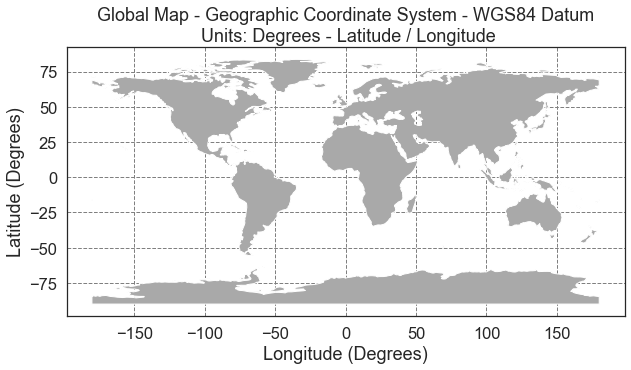

In [3]:
# Plot worldBound data using geopandas
fig, ax = plt.subplots(figsize=(10, 5))
worldBound.plot(color='darkgrey', 
                ax=ax)
# Set the x and y axis labels
ax.set(xlabel="Longitude (Degrees)",
       ylabel="Latitude (Degrees)",
       title="Global Map - Geographic Coordinate System - WGS84 Datum\n Units: Degrees - Latitude / Longitude")

# Add the x y graticules
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', 
              linestyle='dashed')
ax.xaxis.grid(color='gray', 
              linestyle='dashed')

### Create Spatial Points Object

Next, add three coordinate locations to your map. Note that the UNITS are
in decimal **degrees** (latitude, longitude):

* Boulder, Colorado:  40.0274, -105.2519
* Oslo, Norway: 59.9500, 10.7500
* Mallorca, Spain: 39.6167, 2.9833

To plot these points spatially you will

1. create a numpy array of the point locations and
2. Use a for loop to populate a `shapely` `Point` object


In [4]:
# Create numpy array of x,y point locations
add_points = np.array([[-105.2519,   40.0274], 
                       [  10.75  ,   59.95  ], 
                       [   2.9833,   39.6167]])

# Turn points into list of x,y shapely points 
city_locations = [Point(xy) for xy in add_points]
city_locations

In [5]:
# Create geodataframe using the points
city_locations = gpd.GeoDataFrame(city_locations, 
                                  columns=['geometry'],
                                  crs=worldBound.crs)
city_locations.head(3)

,geometry
0,POINT (-105.25190 40.02740)
1,POINT (10.75000 59.95000)
2,POINT (2.98330 39.61670)


Finally you can plot the points on top of your world map. Does it look right?

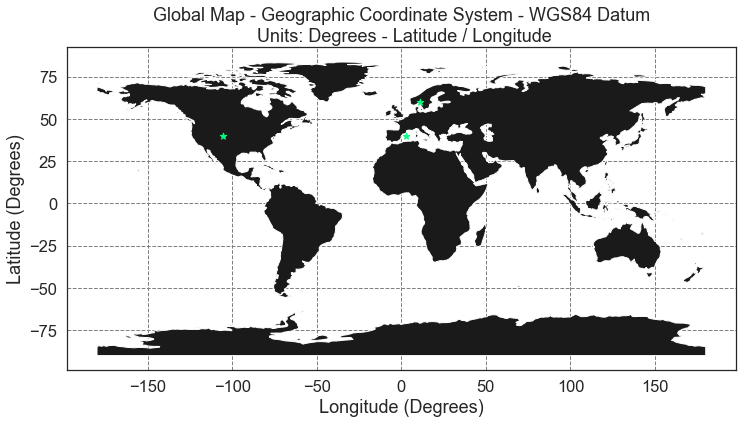

In [6]:
# Plot point locations
fig, ax = plt.subplots(figsize=(12, 8))

worldBound.plot(figsize=(10, 5), color='k',
               ax=ax)
# Add city locations
city_locations.plot(ax=ax, 
                    color='springgreen', 
                    marker='*',
                    markersize=45)

# Setup x y axes with labels and add graticules
ax.set(xlabel="Longitude (Degrees)", ylabel="Latitude (Degrees)",
       title="Global Map - Geographic Coordinate System - WGS84 Datum\n Units: Degrees - Latitude / Longitude")
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed')
ax.xaxis.grid(color='gray', linestyle='dashed')

Next, import proper graticules that can be projected into a particular coordinate reference system.

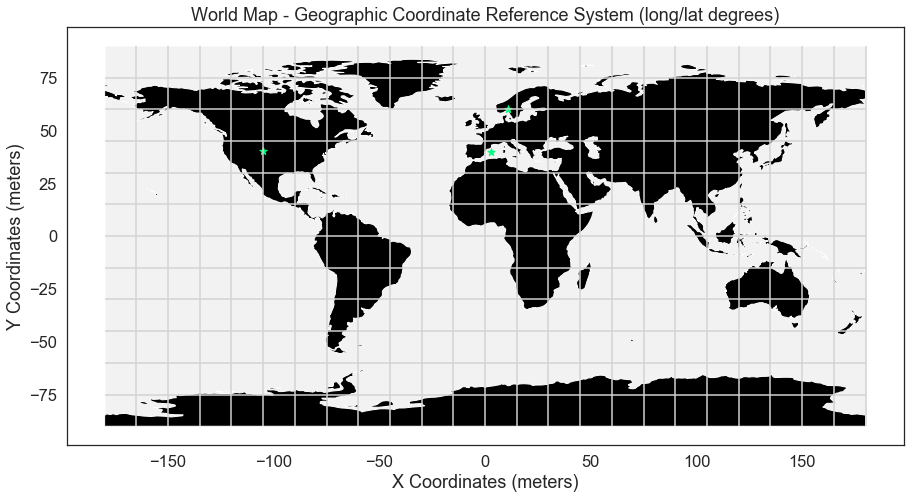

In [7]:
# Import graticule & world bounding box shapefile data
graticule_path = os.path.join("data", "spatial-vector-lidar", "global", 
                              "ne_110m_graticules_all", "ne_110m_graticules_15.shp")
graticule = gpd.read_file(graticule_path)

bbox_path = os.path.join("data", "spatial-vector-lidar", "global", 
                         "ne_110m_graticules_all", "ne_110m_wgs84_bounding_box.shp")
bbox = gpd.read_file(bbox_path)

# Create map axis object
fig, ax = plt.subplots(1, 1, figsize=(15, 8))

# Add bounding box and graticule layers
bbox.plot(ax=ax, alpha=.1, color='grey')
graticule.plot(ax=ax, color='lightgrey')
worldBound.plot(ax=ax, color='black')

# Add points to plot 
city_locations.plot(ax=ax, 
                    markersize=60, 
                    color='springgreen',
                    marker='*')
# Add title and axes labels
ax.set(title="World Map - Geographic Coordinate Reference System (long/lat degrees)",
       xlabel="X Coordinates (meters)",
       ylabel="Y Coordinates (meters)");

## Geographic CRS - The Good & The Less Good

Geographic coordinate systems in decimal degrees are helpful when you need to
locate places on the Earth. However, latitude and longitude
locations are not located using uniform measurement units. Thus, geographic
CRSs are not ideal for measuring distance. This is why other projected `CRS`
have been developed.

<figure>
	<a href="{{ site.url }}/images/earth-analytics/spatial-data/latitude-longitude-globe-ESRI.gif">
	<img src="{{ site.url }}/images/earth-analytics/spatial-data/latitude-longitude-globe-ESRI.gif" alt="Graphic showing lat long as placed over the globe by ESRI. A geographic coordinate system locates latitude and longitude
	location using angles. Thus, the spacing of each line of latitude moving north
	and south is not uniform. Source: ESRI"></a>
	<figcaption>A geographic coordinate system locates latitude and longitude
	location using angles. Thus the spacing of each line of latitude moving north
	and south is not uniform.
	Source: ESRI
	</figcaption>
</figure>


## Projected CRS - Robinson

You can view the same data above, in another CRS - `Robinson`. `Robinson` is a
**projected** `CRS`. Notice that the country boundaries on the map - have a
different shape compared to the map that you created above in the `CRS`:
**Geographic lat/long WGS84**. 

Below you first reproject your data into the robinson projects (`+proj=robin`). Then you plot the data once again. 

/home/jpalomino/miniconda3/envs/earth-analytics-python/lib/python3.7/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))
/home/jpalomino/miniconda3/envs/earth-analytics-python/lib/python3.7/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


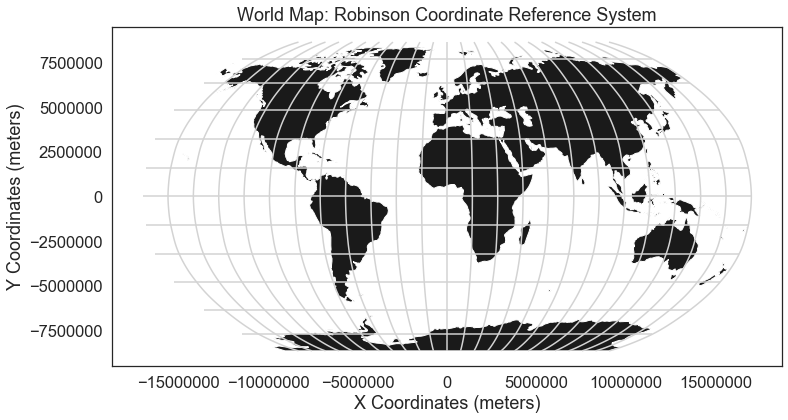

In [8]:
# Reproject the data
worldBound_robin = worldBound.to_crs('+proj=robin')
graticule_robin = graticule.to_crs('+proj=robin')

# Plot the data
fig, ax = plt.subplots(figsize=(12, 8))

worldBound_robin.plot(ax=ax,
                      color='k')

graticule_robin.plot(ax=ax, color='lightgrey')

ax.set(title="World Map: Robinson Coordinate Reference System",
       xlabel="X Coordinates (meters)",
       ylabel="Y Coordinates (meters)")

for axis in [ax.xaxis, ax.yaxis]:
    formatter = ScalarFormatter()
    formatter.set_scientific(False)
    axis.set_major_formatter(formatter)

What happens if you add the same Lat / Long coordinate locations that
you used above, to your map? Remember that the data on your map are in 
the `CRS` - `Robinson`.

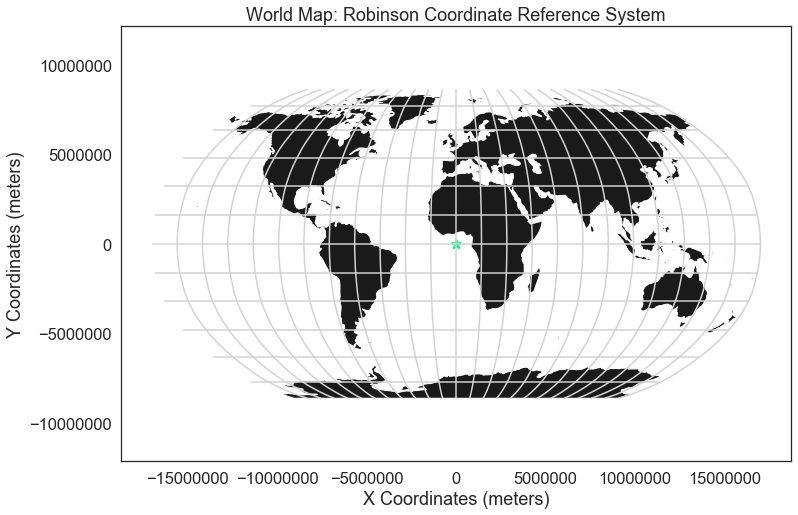

In [9]:
# Plot the data
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

worldBound_robin.plot(ax=ax,
                      color='k')
graticule_robin.plot(ax=ax, 
                     color='lightgrey')
city_locations.plot(ax=ax, 
                    marker='*', 
                    color='springgreen', 
                    markersize=100)

ax.set(title="World Map: Robinson Coordinate Reference System", 
       xlabel="X Coordinates (meters)",
       ylabel="Y Coordinates (meters)")

for axis in [ax.xaxis, ax.yaxis]:
    formatter = ScalarFormatter()
    formatter.set_scientific(False)
    axis.set_major_formatter(formatter)
    
plt.axis('equal');    

Notice above that when you try to add lat/long coordinates in degrees, to a map
in a different `CRS`, the points are not in the correct location. You need
to first convert the points to the same CRS that your other data are in.
The process of converting a dataset from one CRS to another is often referred
to as **reprojection**. 

In python, you use the `.to_crs` method to reproject your data.


/home/jpalomino/miniconda3/envs/earth-analytics-python/lib/python3.7/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


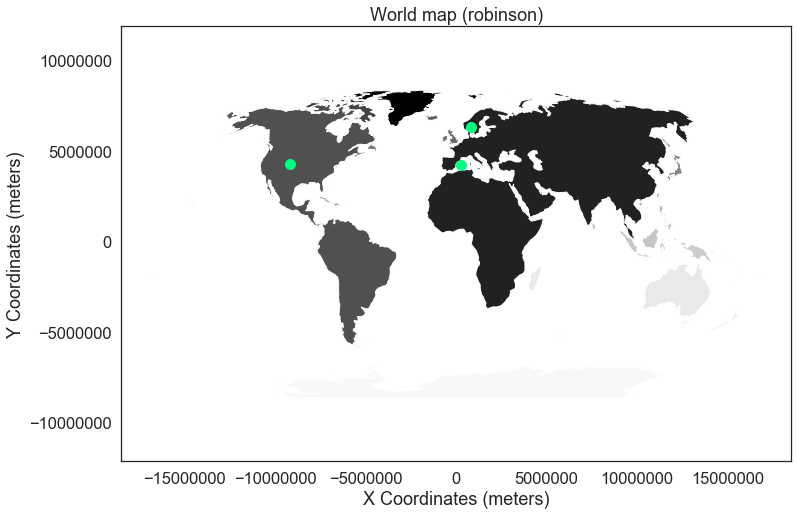

In [10]:
# Reproject point locations to the Robinson projection
city_locations_robin = city_locations.to_crs(worldBound_robin.crs)

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
worldBound_robin.plot(ax=ax, 
                      cmap='Greys')
ax.set(title="World map (robinson)", 
       xlabel="X Coordinates (meters)",
       ylabel="Y Coordinates (meters)")
city_locations_robin.plot(ax=ax, markersize=100, color='springgreen')

for axis in [ax.xaxis, ax.yaxis]:
    formatter = ScalarFormatter()
    formatter.set_scientific(False)
    axis.set_major_formatter(formatter)

plt.axis('equal');

### Compare Maps

Both of the plots above look visually different and also use a different coordinate system. Look at both, side by side, with the actual **graticules** or latitude and longitude lines rendered on the map.


/home/jpalomino/miniconda3/envs/earth-analytics-python/lib/python3.7/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))
/home/jpalomino/miniconda3/envs/earth-analytics-python/lib/python3.7/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


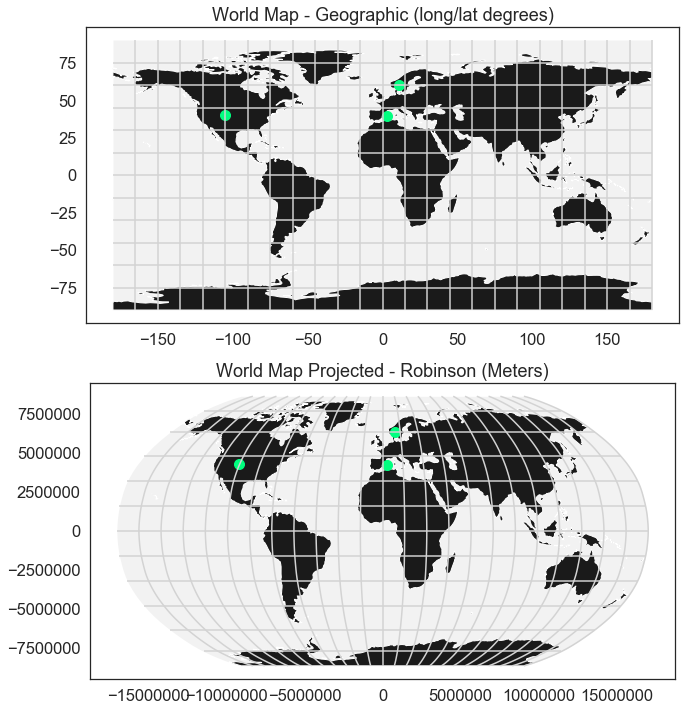

In [11]:
# Reproject graticules and bounding box  to robinson
graticule_robinson = graticule.to_crs('+proj=robin')
bbox_robinson = bbox.to_crs('+proj=robin')

# Setup plot with 2 "rows" one for each map and one column
fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(13, 12))

# First plot
bbox.plot(ax=ax0,
          alpha=.1,
          color='grey')

graticule.plot(ax=ax0,
               color='lightgrey')

worldBound.plot(ax=ax0,
                color='k')

city_locations.plot(ax=ax0,
                    markersize=100,
                    color='springgreen')

ax0.set(title="World Map - Geographic (long/lat degrees)")

# Second plot
bbox_robinson.plot(ax=ax1,
                   alpha=.1,
                   color='grey')

graticule_robinson.plot(ax=ax1,
                        color='lightgrey')

worldBound_robin.plot(ax=ax1,
                      color='k')

city_locations_robin.plot(ax=ax1,
                          markersize=100,
                          color='springgreen')

ax1.set(title="World Map Projected - Robinson (Meters)")

for axis in [ax1.xaxis, ax1.yaxis]:
    formatter = ScalarFormatter()
    formatter.set_scientific(False)
    axis.set_major_formatter(formatter)

## Why Multiple CRS?

You may be wondering, why bother with different CRSs if it makes your
analysis more complicated? Well, each `CRS` is optimized to best represent the:

* shape and/or
* scale / distance and/or
* area

of features in the data. And no one CRS is great at optimizing all three elements: shape, distance AND
area. Some CRSs are optimized for shape, some are optimized for distance and
some are optimized for area. Some
CRSs are also optimized for particular regions -
for instance the United States, or Europe. Discussing `CRS` as it optimizes shape,
distance and area is beyond the scope of this tutorial, but it's important to
understand that the `CRS` that you chose for your data, will impact working with
the data.

We will discuss some of the differences between the projected UTM CRS and geographic
WGS84 in the next lesson.



<div class="notice--warning" markdown="1">

## <i class="fa fa-pencil-square-o" aria-hidden="true"></i> Challenge

1. Compare the maps of the globe above. What do you notice about the shape of the
various countries. Are there any signs of distortion in certain areas on either
map? Which one is better?

2. Look at the image below which depicts maps of the United States in 4 different
`CRS`s. What visual differences do you notice in each map? Look up each projection
online, what elements (shape,area or distance) does each projection used in
the graphic below optimize?

<!--
## notes about robinson -- you will see distortion above 40 = 45 degrees latitude
## it is optimized for the latitudes between 0-45 (north and south).

## geographic - notice that the latitude lines are closer together are you move
## north...

# What each CRS optimizes:
## Mercator:
## ALbers Equal Area
## UTM Zone 11n
## Geographic WGS84 (lat/lon):
-->

<!-- answers - this should be hidden frm the final page 0 is it?
Robinson: You will see distortion above 40 = 45 degrees latitude

# ## it is optimized for the latitudes between 0-45 (north and south). -->

</div>


<figure>
    <a href="{{ site.url }}/images/earth-analytics/spatial-data/compare-mercator-utm-wgs-projections.jpg">
    <img src="{{ site.url }}/images/earth-analytics/spatial-data/compare-mercator-utm-wgs-projections.jpg" alt="Maps of the United States in different CRS including Mercator
    (upper left), Albers equal area (lower left), UTM (Upper RIGHT) and
    WGS84 Geographic (Lower RIGHT). Notice the differences in shape and orientation associated with each
    CRS. These differences are a direct result of the
    calculations used to flatten the data onto a two dimensional map.
    Source: opennews.org">
    </a>

    <figcaption>Maps of the United States in different CRS including Mercator
    (upper left), Albers equal area (lower left), UTM (Upper RIGHT) and
    WGS84 Geographic (Lower RIGHT).
    Notice the differences in shape and orientation associated with each
    CRS. These differences are a direct result of the
    calculations used to "flatten" the data onto a two dimensional map.
    Source: opennews.org</figcaption>
</figure>


### Geographic vs. Projected CRS

The above maps provide examples of the two main types of coordinate systems:

1. **Geographic coordinate systems:** coordinate systems that span the entire
globe (e.g. latitude / longitude).
2. **Projected coordinate Systems:** coordinate systems that are localized to
minimize visual distortion in a particular region (e.g. Robinson, UTM, State Plane)

You will discuss these two coordinate reference systems types in more detail
in the next lesson.

<div class="notice--info" markdown="1">

## Additional Resources

* Read more on coordinate systems in the
<a href="http://docs.qgis.org/2.0/en/docs/gentle_gis_introduction/coordinate_reference_systems.html" target="_blank" data-proofer-ignore=''>
QGIS documentation.</a>
* For more on the types of projections, visit
<a href="http://help.arcgis.com/en/arcgisdesktop/10.0/help/index.html#/Datums/003r00000008000000/" target="_blank"> ESRI's ArcGIS reference on projection types.</a>.
* Read more about <a href="https://source.opennews.org/en-US/learning/choosing-right-map-projection/" target="_blank"> choosing a projection/datum.</a>
</div>